In [5]:
import cPickle

# PARAMS
log_dir = "/home/sforesti/avakas/scratch/sforestier001/logs/CogSci2017/2017-01-16_12-32-59-COGSCI"


filename = log_dir + '/results/vocal.pickle'
with open(filename, 'r') as f:
    data_vocal = cPickle.load(f)

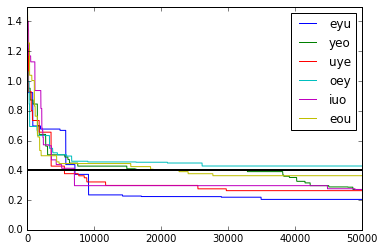

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

config_list = ["RMB"]
n_trials = 100
n_iter = 50000
iter_ds = 10
trial_list = range(1,n_trials + 1) 
config_name = "RMB"

x = [iter_ds*i for i in range(n_iter/iter_ds)]

for trial in [3]:
    human_sounds = data_vocal[config_name][trial]["human_sounds"]    
    for hs in human_sounds:
        plt.plot(x, [data_vocal[config_name][trial]["errors"][i][hs] for i in range(n_iter/iter_ds)], label=hs)
        
plt.ylim([0, 1.5])       
plt.xlim([0, n_iter])  
plt.plot((0, n_iter), (0.4, 0.4), '-', lw=2)
plt.legend()

In [95]:
ta = 3000 # * 10
tb = 300

import numpy as np

def time_limit(error_evolution):
    tl = len(error_evolution)-1
    while error_evolution[tl] < 0.4:
        tl -= 1
    return tl
    
def synchro(ee_list):
    l = []
    for ee in ee_list:
        tl_ee = time_limit(ee)
        if tl_ee < n_iter/iter_ds-ta and tl_ee > tb:
            l += [ee[tl_ee-tb:tl_ee+ta]]
    return l
            
ee_list_s = []
ee_list_ns = []

for trial in trial_list:
    human_sounds = data_vocal[config_name][trial]["human_sounds"]    
    for hs in human_sounds[:3]:
        ee_list_s += [[data_vocal[config_name][trial]["errors"][i][hs] for i in range(n_iter/iter_ds)]]
        
    for hs in human_sounds[3:]:
        ee_list_ns += [[data_vocal[config_name][trial]["errors"][i][hs] for i in range(n_iter/iter_ds)]]
        
ee_s_synchro = synchro(ee_list_s)
ee_ns_synchro = synchro(ee_list_ns)
    


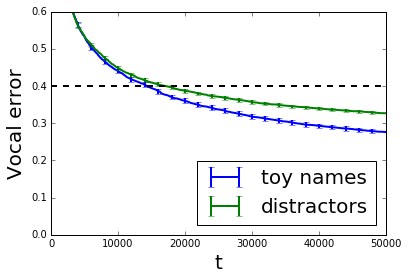

In [96]:
x = [10*i for i in range(5000)]
plt.errorbar(x[::10], np.mean(ee_list_s, axis=0)[:5000][::10], np.std(ee_list_s, axis=0)[:5000][::10]/np.sqrt(len(ee_list_s)), label="toy names", lw=2, errorevery=20)
plt.errorbar(x[::10], np.mean(ee_list_ns, axis=0)[:5000][::10], np.std(ee_list_ns, axis=0)[:5000][::10]/np.sqrt(len(ee_list_ns)), label="distractors", lw=2, errorevery=20)

plt.xlabel("t", fontsize=20)
plt.ylabel("Vocal error", fontsize=20)
plt.ylim([0, 0.6])       
plt.xlim([0, 50000])  
plt.plot((0, 50000), (0.4, 0.4), 'k--', lw=2)
plt.legend(loc="lower right", fontsize=20)

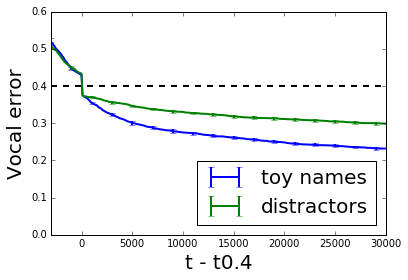

In [97]:
x = [10*(i - tb) for i in range(ta+tb)]
plt.errorbar(x[::10], np.mean(ee_s_synchro, axis=0)[::10], np.std(ee_s_synchro, axis=0)[::10]/np.sqrt(len(ee_s_synchro)), label="toy names", lw=2, errorevery=20)
plt.errorbar(x[::10], np.mean(ee_ns_synchro, axis=0)[::10], np.std(ee_ns_synchro, axis=0)[::10]/np.sqrt(len(ee_s_synchro)), label="distractors", lw=2, errorevery=20)

plt.xlabel("t - t0.4", fontsize=20)
plt.ylabel("Vocal error", fontsize=20)
plt.ylim([0, 0.6])       
plt.xlim([-10*tb, 10*ta])  
plt.plot((-10*tb, 10*ta), (0.4, 0.4), 'k--', lw=2)
plt.legend(loc="lower right", fontsize=20)

In [98]:
print np.mean(ee_s_synchro, axis=0), np.std(ee_s_synchro, axis=0)
print np.mean(ee_ns_synchro, axis=0), np.std(ee_ns_synchro, axis=0)
print len(ee_s_synchro)
print len(ee_ns_synchro)

[ 0.51936642  0.51936642  0.51926636 ...,  0.23179705  0.23179705
  0.23179705] [ 0.12624594  0.12624594  0.12632883 ...,  0.04971936  0.04971936
  0.04971936]
[ 0.50791732  0.50791732  0.50791732 ...,  0.29883932  0.29883932
  0.29883932] [ 0.12111913  0.12111913  0.12111913 ...,  0.05164785  0.05164785
  0.05164785]
165
171
